<h3 style='text-align: center;'>Physics 1 HW - Kinematics 🚀</h3>

### 1. Yuval Kogan - 207840042
### 2. Yaniv Bodaga - 314700428

<p dir="rtl">כוכב הלכת E נע במעגל סביב השמש, שנמצאת בראשית הצירים. רדיוס המעגל R וזמן המחזור T. גם כוכב הלכת M נע במעגל סביב השמש ברדיוס 1.52 R ובזמן מחזור 1.88 T. שני המעגלים באותו המישור. ברגע שאותו בחרנו t = 0 הזווית בין הקוטר המחבר את שני כוכבי הלכת היא 180°.</p>

<p dir="rtl">1. שרטטו על גרף אחד את מסלול כוכבי הלכת. הוסיפו נקודה עבור השמש. הגרילו רגע שרירותי וציירו נקודה (כחולה E ואדומה M) עבור כל אחד מכוכבי הלכת על המסלול שלו.</p>

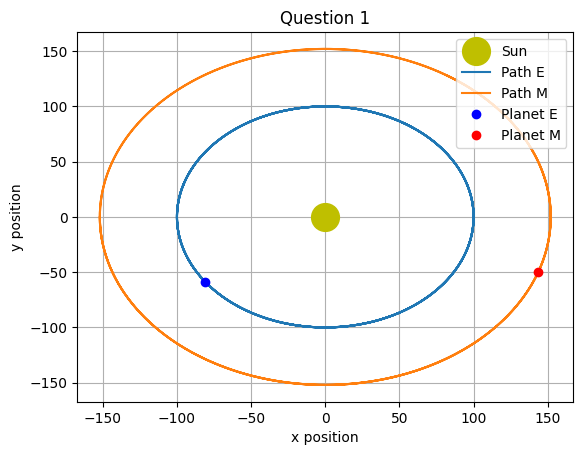

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R = int(input("Enter the radius R for star E: "))
T = int(input("Enter the period time T for start E: "))

radius_E = R
period_time_E = T

radius_M = R * 1.52
period_time_M = T * 1.88

# Helper function to calculate the position of an object in a uniform circular motion.
def position(theta, radius):
    return radius * np.cos(theta) , radius * np.sin(theta)

t = np.linspace(0, 5 * T, 1000) # Time array 

# angular velocity (little omega) = 2pi/T
theta_E = 2 * np.pi * t / period_time_E
theta_M = 2 * np.pi * t / period_time_M + np.pi # The extra pi comes from the fact that at t_0 the initial angle between the planets is 180 degrees.

E_x_position, E_y_position = position(theta_E, radius_E) 
M_x_position, M_y_position = position(theta_M, radius_M)

# Question 1
plt.title("Question 1")
plt.xlabel("x position")
plt.ylabel("y position")
plt.plot(0, 0, "yo", ms = 20, label = "Sun")


plt.plot(E_x_position, E_y_position, label = "Path E")
plt.plot(M_x_position, M_y_position, label = "Path M")

moment_t = np.random.randint(1000)

plt.plot(E_x_position[moment_t], E_y_position[moment_t], "bo" , label = "Planet E")
plt.plot(M_x_position[moment_t], M_y_position[moment_t], "ro" , label = "Planet M")
plt.legend(loc = "upper right")
plt.grid()

plt.show()



<p dir="rtl">2.מתי כוכב הלכת M חוזר לראשונה לאותו מקום בשמיים כפי שהוא נצפה מכוכב הלכת E? נסמן את זמן זה ב T_3.</p>

In [2]:
# Question 2
relative_angle = np.unwrap(theta_M - theta_E) # Find the angular difference between the planets.

T_3 = None
for i in range(1, len(t)):
    if abs(relative_angle[i]) % (2 * np.pi) < 1e-2:
        T_3 = t[i] * period_time_E 
        break

if T_3:
    print(f"T_3 = {T_3:.2f} seconds")
else:
    print("T_3 not found within the given range.")

T_3 = 10874.94 seconds


<p dir="rtl">3. שרטטו גרף של מיקום M ביחס ל-E מרגע t=0 ועד t = T_3.</p>

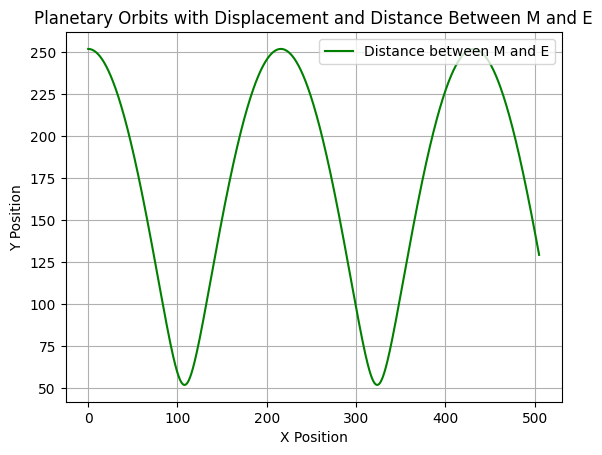

In [3]:
# Calculate distance between M and E for each time step
distances = np.sqrt((M_x_position - E_x_position)**2 + (M_y_position - E_y_position)**2)

# Question 3
T_3_index = np.argmin(np.abs(t - T_3))  # Find the index where t is closest to T_3

# Get the position of M at t = 0
M_x_0, M_y_0 = position(theta_M[0], radius_M)  # Position of M at t=0

# Get the position of M at T_3 using the correct index
M_x_T3, M_y_T3 = position(theta_M[T_3_index], radius_M)  # Position of M at T_3

# Calculate displacement difference between M at T_3 and M at t=0
displacement_M = np.sqrt((M_x_T3 - M_x_0)**2 + (M_y_T3 - M_y_0)**2)

# Add line graph for the changing distance between M and E
plt.plot(t, distances, color='green', label="Distance between M and E")

plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc='upper right')
plt.title("Planetary Orbits with Displacement and Distance Between M and E")
plt.grid()
plt.show()


<p dir="rtl">4. מיצאו את הזווית בין ווקטור המקום של M ביחס לE וציר x הציגו אותה בגרף. (הדרכה: השתמשו בפקודות numpy.unwrap ,numpy.arctan2.) השתמשו בגרפים שיצרתם כדי להסביר מהי תופעת התנועה האחורית (retrograde motion) באסטרונומיה. כיתבו קוד המוצא את משך זמן התנועה האחורית של M ביחס לE. מהי התוצאה המתקבלת?</p>

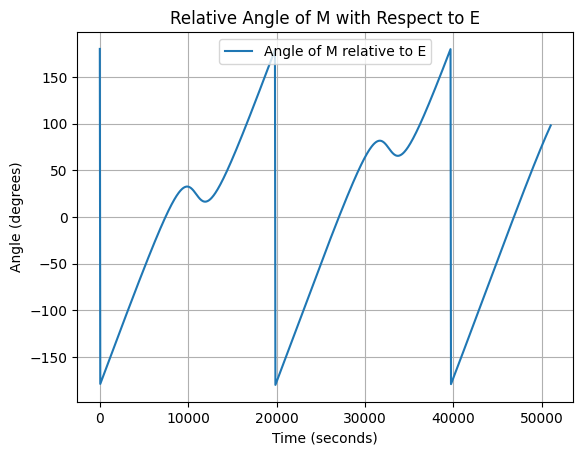

In [4]:
# Question 4
relative_x = M_x_position - E_x_position
relative_y = M_y_position - E_y_position
angle_relative = np.arctan2(relative_y, relative_x)

plt.figure()
plt.plot(t * period_time_E, np.degrees(angle_relative), label='Angle of M relative to E')
plt.xlabel("Time (seconds)")
plt.ylabel("Angle (degrees)")
plt.title("Relative Angle of M with Respect to E")
plt.legend()
plt.grid()
plt.show()

<p dir ="rtl">
<strong>תנועה אחורית (מכונה גם נסיגה) באסטרונומיה מתייחס לתופעה בה כוכבי הלכת נראים כאילו הם מחליפים את כוון תנועתם יחסית לכוכבי השבת באופן זמני ואז חוזרים שוב לכוון תנועתם המקורי (התנועה "הקדומנית" של כוכבי הלכת). התופעה הנובעת מהתנועה היחסית של כדור הארץ וכוכבי הלכת במהלכם סביב השמש.</strong>
<p>

### Retrograde motion explanation:
<p dir ="rtl">
בכדי לזהות תנועה אחורית, אנחנו יכולים לחשב את קצב השינוי של ההפרש הזוויתי בין M ו-E בזמן:

1. מהירות זוויתי חיובית - מצביעה על תנועה רגילה כזו שM נמאצת לפני E במעגל.
2. מהירות זוויתית שלילית - מצביעה על תנועה אחורית, כלומר כאשר M עובר אחורי E בתצפית.
<p>

In [5]:
angular_velocity = np.gradient(angle_relative, t * period_time_E)
retrograde_periods = np.where(angular_velocity > 0)[0]
retrograde_time = len(retrograde_periods) * (t[1] - t[0]) * period_time_E
print(f"Total retrograde motion duration: {retrograde_time:.2f} seconds")

Total retrograde motion duration: 46665.24 seconds


<p dir="rtl">5. מהו הזמן שחולף בין שתי פעמים בהן M וE רחוקים ביותר זה מזה? מהו המרחק הגדול ביותר בין הכוכבים, ומהו המרחק הקטן ביותר ביניהם? הציגו גרפים מתאימים.</p>

In [6]:
# Question 5
relative_distance = np.sqrt(relative_x**2 + relative_y**2)
max_distance = np.max(relative_distance)
min_distance = np.min(relative_distance)
print(f"Max distance: {max_distance:.2f} R, Min distance: {min_distance:.2f} R")

Max distance: 252.00 R, Min distance: 52.00 R


<p dir="rtl">6. אלון מבקש לשגר חללית מE לM מהירות החללית 0.01R\T נסמן בt=t_0 את הרגע בו הכוכבים קרובים ביותר זה לזה. מתי החללית צריכה לצאת לדרך כדי שתגיע לM בזמן המסע הקצר היותר?</p>

In [7]:
# Question 6
min_distance_index = np.argmin(relative_distance)
optimal_time = t[min_distance_index]
print(f"The most optimal time for Alon to fly his space craft is at: {optimal_time:.2f} seconds.")

The most optimal time for Alon to fly his space craft is at: 323.52 seconds.


### 1. Yuval Kogan - 207840042
### 2. Yaniv Bodaga - 314700428